In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tqdm
import os

In [16]:
def prepend_line(file_name, line):
    """ Insert given string as a new line at the beginning of a file """
    # define name of temporary dummy file
    dummy_file = file_name + '.bak'
    # open original file in read mode and dummy file in write mode
    with open(file_name, 'r') as read_obj, open(dummy_file, 'w') as write_obj:
        # Write given line to the dummy file
        write_obj.write(line + '\n')
        # Read lines from original file one by one and append them to the dummy file
        for line in read_obj:
            write_obj.write(line)
    # remove original file
    os.remove(file_name)
    # Rename dummy file as the original file
    os.rename(dummy_file, file_name)

def createpores(initialdistr, porosity,xlo,xhi,ylo,yhi,zlo,zhi):
    A=initialdistr
    pores=[]
    A2=A.copy()
    validatoms=np.ones(len(A2))
    coords=np.array((A2[['x','y','z']]))
    for i in range(500000):
        pore=(np.random.random(3)*(-xlo+xhi,-ylo+yhi,-zlo+zhi),np.random.lognormal(1.5, 0.1 ,1))
        validatoms=validatoms*np.linalg.norm(coords-pore[0],axis=1)>pore[1]
        #coords=np.where(coords < y, x, 10 + y)
        pores.append(pore)
        #A2=A2[A2[['x','y','z']].apply(lambda row: np.linalg.norm(np.array([row[0]-pore[0][0],row[1]-pore[0][1],row[2]-pore[0][2]]))>pore[1][0],axis=1)]
        #if i %100==0:
            #print (np.sum(validatoms))
            #print (np.sum(validatoms)/len(A))
        if np.sum(validatoms)/len(A)<(1-porosity):
            return pores, validatoms
    return pores, validatoms

def createverticalpores(initialdistr, porosity,xlo,xhi,ylo,yhi,zlo,zhi):
    A=initialdistr
    pores=[]
    A2=A.copy()
    validatoms=np.ones(len(A2))
    coords=np.array((A2[['x','y','z']]))
    for i in range(500000):
        pore=(np.random.random(3)*(-xlo+xhi,-ylo+yhi,-zlo+zhi),np.random.lognormal(1.5, 0.1 ,1))
        validatoms=validatoms*np.linalg.norm((coords-pore[0])[:,:2],axis=1)>pore[1]
        pores.append(pore)
        if np.sum(validatoms)/len(A)<(1-porosity):
            return pores, validatoms
    return pores, validatoms
def createhorizontalpores(initialdistr, porosity,xlo,xhi,ylo,yhi,zlo,zhi):
    A=initialdistr
    pores=[]
    A2=A.copy()
    validatoms=np.ones(len(A2))
    coords=np.array((A2[['x','y','z']]))
    for i in range(500000):
        pore=(np.random.random(3)*(-xlo+xhi,-ylo+yhi,-zlo+zhi),np.random.lognormal(1.5, 0.1 ,1))
        validatoms=validatoms*np.linalg.norm((coords-pore[0])[:,1:],axis=1)>pore[1]
        pores.append(pore)
        if np.sum(validatoms)/len(A)<(1-porosity):
            return pores, validatoms
    return pores, validatoms
def createmesopores(initialdistr, porosity,xlo,xhi,ylo,yhi,zlo,zhi):
    A=initialdistr
    pores=[]
    A2=A.copy()
    validatoms=np.ones(len(A2))
    coords=np.array((A2[['x','y','z']]))
    for i in tqdm.tqdm(range(500000)):
        pore=(np.random.random(3)*(-xlo+xhi,-ylo+yhi,-zlo+zhi),np.random.lognormal(1.8, 0.01 ,1)) #d from 6 to 9 nm
        validatoms=validatoms*np.linalg.norm(coords-pore[0],axis=1)>pore[1]
        #coords=np.where(coords < y, x, 10 + y)
        pores.append(pore)
        #A2=A2[A2[['x','y','z']].apply(lambda row: np.linalg.norm(np.array([row[0]-pore[0][0],row[1]-pore[0][1],row[2]-pore[0][2]]))>pore[1][0],axis=1)]
        #if i %100==0:
            #print (np.sum(validatoms))
            #print (np.sum(validatoms)/len(A))
        if np.sum(validatoms)/len(A)<(1-porosity):
            return pores, validatoms
    print('small amount of pores')
    return pores, validatoms

In [17]:
#sizes in angstrems
xlo=0
xhi=54.3
ylo=0
yhi=54.3
zlo=0
zhi=543
allcoords=pd.read_csv('Si_1010100.csv',skiprows=9,delimiter=' ',names=['id', 'type','x','y','z'])
'''allcoords[['x']]=allcoords[['x']]*(xhi-xlo)
allcoords[['y']]=allcoords[['y']]*(yhi-ylo)
allcoords[['z']]=allcoords[['z']]*(zhi-zlo)'''

"allcoords[['x']]=allcoords[['x']]*(xhi-xlo)\nallcoords[['y']]=allcoords[['y']]*(yhi-ylo)\nallcoords[['z']]=allcoords[['z']]*(zhi-zlo)"

In [4]:
A=allcoords
pores=[]
A2=A.copy()
validatoms=np.ones(len(A2))
coords=np.array((A2[['x','y','z']]))
for i in tqdm.tqdm(range(100000)):
    pore=(np.random.random(3)*(-xlo+xhi,-ylo+yhi,-zlo+zhi),np.random.lognormal(3.1, 0.1 ,1))
    validatoms=validatoms*np.linalg.norm((coords-pore[0])[:,1:],axis=1)>pore[1]
    pores.append(pore)

 12%|█▏        | 12329/100000 [00:06<00:48, 1791.78it/s]


KeyboardInterrupt: 

100%|██████████| 100000/100000 [00:02<00:00, 33774.47it/s]


Text(0, 0.5, 'N of pores')

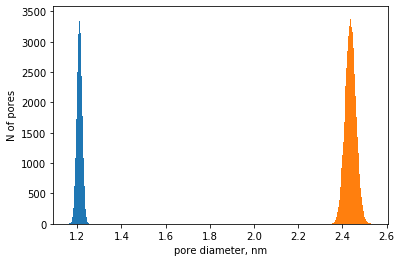

In [18]:
#['1_2nmpores','1_6nmpores','1_8nmpores','2_5nmpores', '3nmpores']:
for center in [1.8,2.5]:
    pores=[]
    for i in tqdm.tqdm(range(100000)):
        pore=(np.random.random(3)*(-xlo+xhi,-ylo+yhi,-zlo+zhi),np.random.lognormal(center, 0.01 ,1))
        #validatoms=validatoms*np.linalg.norm((coords-pore[0])[:,1:],axis=1)>pore[1]
        pores.append(pore[1])
    plt.hist(np.stack(pores)*2/10, bins=100, label=center)
'''pores=[]
for i in tqdm.tqdm(range(100000)):
    pore=(np.random.random(3)*(-xlo+xhi,-ylo+yhi,-zlo+zhi),np.random.lognormal(1.5, 0.01 ,1))
    #validatoms=validatoms*np.linalg.norm((coords-pore[0])[:,1:],axis=1)>pore[1]
    pores.append(pore[1])
plt.hist(np.stack(pores), bins=100, label='microopores')'''
plt.xlabel('pore diameter, nm')
plt.ylabel('N of pores')
#plt.legend()

In [51]:
#allcoords2=allcoords[validatoms].copy()
#allcoords2=allcoords2.reset_index(drop=True)
#allcoords2['id']=allcoords2.index
#allcoords2['id']=allcoords2['id']+1

In [49]:
arr=np.array(allcoords2[['x','y','z']])
#arr2=np.array(poresdist[['x','y','z']])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax2 = fig.add_subplot(111, projection='3d')
ax.scatter(arr[:,0],arr[:,1],arr[:,2],s=0.1)
#ax2.scatter(arr2[:,0],arr2[:,1],arr2[:,2],s=0.1)

In [8]:
for por in [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1, 0.0]:
    print (por)
    pores, validatoms=createmesopores(allcoords, por,xlo,xhi,ylo,yhi,zlo,zhi)
    allcoords2=allcoords[validatoms].copy()
    allcoords2=allcoords2.reset_index(drop=True)
    allcoords2['id']=allcoords2.index
    allcoords2['id']=allcoords2['id']+1
    allcoords2.to_csv('silicon1_2nmpores{}.csv'.format(por), sep=' ',header=None,index=None)
    initstring='''initial_atoms_position_fullcrystal
    {} atoms
    1 atom types
    {} {} xlo xhi
    {} {} ylo yhi
    {} {} zlo zhi

    Atoms
    '''.format(len(allcoords),xlo, xhi, ylo,yhi, zlo,zhi)
    finstring='''initial_atoms_position_fullcrystal
    {} atoms
    1 atom types
    {} {} xlo xhi
    {} {} ylo yhi
    {} {} zlo zhi

    Atoms
    '''.format(len(allcoords2),xlo, xhi, ylo,yhi, zlo,zhi)
    #prepend_line('initialtocsv.csv', initstring)
    prepend_line('silicon1_2nmpores{}.csv'.format(por), finstring)

  0%|          | 112/500000 [00:00<07:27, 1116.61it/s]

0.9


  0%|          | 132/500000 [00:00<06:19, 1317.81it/s]

0.8


  0%|          | 128/500000 [00:00<06:31, 1277.77it/s]

0.7


  0%|          | 134/500000 [00:00<06:14, 1336.31it/s]

0.6


  0%|          | 142/500000 [00:00<05:52, 1418.49it/s]

0.5


  0%|          | 128/500000 [00:00<06:31, 1276.22it/s]

0.4


  0%|          | 139/500000 [00:00<06:01, 1381.68it/s]

0.3


  0%|          | 139/500000 [00:00<06:00, 1385.81it/s]

0.2


  0%|          | 132/500000 [00:00<08:55, 933.32it/s] 

0.1



  0%|          | 0/500000 [00:00<?, ?it/s]


0.0


In [7]:
allcoords.to_csv('initialtocsv.csv', sep=' ',header=None,index=None)
allcoords2=allcoords[validatoms].copy()
allcoords2=allcoords2.reset_index(drop=True)
allcoords2['id']=allcoords2.index
allcoords2['id']=allcoords2['id']+1
allcoords2.to_csv('finaltocsv.csv', sep=' ',header=None,index=None)

initstring='''initial_atoms_position_fullcrystal
{} atoms
1 atom types
{} {} xlo xhi
{} {} ylo yhi
{} {} zlo zhi

Atoms
'''.format(len(allcoords),xlo, xhi, ylo,yhi, zlo,zhi)
finstring='''initial_atoms_position_fullcrystal
{} atoms
1 atom types
{} {} xlo xhi
{} {} ylo yhi
{} {} zlo zhi

Atoms
'''.format(len(allcoords2),xlo, xhi, ylo,yhi, zlo,zhi)
#prepend_line('initialtocsv.csv', initstring)
prepend_line('finaltocsv.csv', finstring)

In [50]:
%matplotlib qt

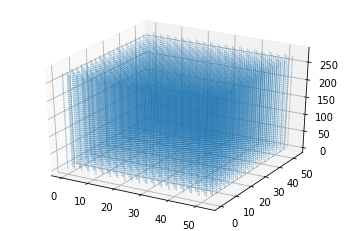

In [15]:
arr=np.array(allcoords2[['x','y','z']])
#arr2=np.array(poresdist[['x','y','z']])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax2 = fig.add_subplot(111, projection='3d')
ax.scatter(arr[:,0],arr[:,1],arr[:,2],s=0.1)
#ax2.scatter(arr2[:,0],arr2[:,1],arr2[:,2],s=0.1)